<a href="https://colab.research.google.com/github/mkatouda/gmxpla/blob/main/gmxpla_tutorial_jp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **gmxplaチュートリアル**

## インストール

### conda環境のインストール

Gromacsのインストール用にminicondaをインストールする。

In [1]:
import os
os.environ['PYTHONPATH'] = ''
!curl -sSL https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh -o /tmp/miniconda.sh
!bash /tmp/miniconda.sh -bfp /opt/miniconda3
os.environ['PATH'] = '/opt/miniconda3/bin:' + os.environ['PATH']
!conda config --add channels conda-forge
!conda update -n base -c defaults conda -y
!conda update -n base -c conda-forge python=3.8 -y

PREFIX=/opt/miniconda3
Unpacking payload ...
Solving environment: \ | / - \ | done

## Package Plan ##

  environment location: /opt/miniconda3

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py39h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py39h06a4308_2
    - cffi==1.15.0=py39hd667e15_1
    - charset-normalizer==2.0.4=pyhd3eb1b0_0
    - colorama==0.4.4=pyhd3eb1b0_0
    - conda-content-trust==0.1.1=pyhd3eb1b0_0
    - conda-package-handling==1.8.1=py39h7f8727e_0
    - conda==4.12.0=py39h06a4308_0
    - cryptography==36.0.0=py39h9ce1e76_0
    - idna==3.3=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=hd4cf53a_17
    - ncurses==6.3=h7f8727e_2
    - openssl==1.1.1n=h7f8727e_0
    - pip==21.2.4=py39h06a4308_0
    - pycosat==0.6.3=py39h27cfd23_0
    - p

### gromacsのインストール

In [2]:
!conda install -c conda-forge gromacs -y

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /opt/miniconda3

  added / updated specs:
    - gromacs


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |       2_kmp_llvm           6 KB  conda-forge
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-22.9.0               |   py39hf3d152e_1         976 KB  conda-forge
    fftw-3.3.10                |nompi_hf0379b8_105         2.2 MB  conda-forge
    gromacs-2022.3             |nompi_hca75aac_100        28.9 MB  conda-forge
    icu-58.2                   |    hf484d3e_1000        22.6 MB  conda

### gmxplaのインストール 

In [3]:
!pip install git+https://github.com/mkatouda/gmxpla.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/mkatouda/gmxpla.git to /tmp/pip-req-build-5esr275h
  Running command git clone -q https://github.com/mkatouda/gmxpla.git /tmp/pip-req-build-5esr275h
  Created wheel for gmxpla: filename=gmxpla-0.0.1-py3-none-any.whl size=5268 sha256=ae2e30633b719a921e4f00e90c5c4d07a9148143899107e9fd3d9b9bb511073a
  Stored in directory: /tmp/pip-ephem-wheel-cache-c3_s1vdo/wheels/b7/17/7d/92484efb4da98fd6a761661f4ee7e8509cb4b81698f971d761
Successfully built gmxpla


### gmxplaヘルプ確認

In [4]:
!gmxpla -h

usage: gmxpla [-h] [-i INP] [-e EDR] [-t TPR] [-x XTC] [-n NDX] [-oc OUTCSV]
              [-v]

gromax protein-ligand MD trajectory analysis tools

optional arguments:
  -h, --help            show this help message and exit
  -i INP, --inp INP     yaml style input file, overwriting argument values (default: None)
  -e EDR, --edr EDR     Gromacs energy file (edr file) (default: None)
  -t TPR, --tpr TPR     Gromacs topology file (tpr or gro file) (default: None)
  -x XTC, --xtc XTC     Gromacs trajectory file (xtc file) (default: None)
  -n NDX, --ndx NDX     Gromacs index file (ndx file) (default: None)
  -oc OUTCSV, --outcsv OUTCSV
                        docking score output (csv file) (default: docking_score.csv)
  -v, --verbose         Verbose output. (default: False)


## サンプルジョブ実行

### githubからコードレポジトリをダウンロード

In [5]:
!git clone https://github.com/mkatouda/gmxpla.git
%cd gmxpla/example/inputs

Cloning into 'gmxpla'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 60 (delta 20), reused 35 (delta 11), pack-reused 0
Unpacking objects: 100% (60/60), done.
/content/gmxpla/example/inputs


### 入力ファイルの確認

In [6]:
!ls

index.ndx  input.yml  prod.edr	prod.gro  prod.tpr  prod.xtc


|ファイル名|キーワード|
|:-|:-|
|input.yml|yamlファイル|
|prod.edr|Gromacs相互作用エネルギーダンプファイル|
|prod.tpr|Gromacsバイナリートポロジーファイル|
|prod.xtc|Gromacsトラジェクトリーファイル|
|index.ndx|Gromacsインデックスファイル|


インプットファイルinput.ymlには入力ファイルのパスを記載

In [7]:
!cat  ./input.yml

edr: './prod.edr'
tpr: './prod.tpr'
xtc: './prod.xtc'
ndx: './index.ndx'
outcsv: './prod_docking_score.csv'
verbose: False


### gmxpla実行

In [8]:
!gmxpla -i ./input.yml

Namespace(edr=None, inp='./input.yml', ndx=None, outcsv='docking_score.csv', tpr=None, verbose=False, xtc=None)
======= Input configulations =======
edr: ./prod.edr
tpr: ./prod.tpr
xtc: ./prod.xtc
ndx: ./index.ndx
outcsv: ./prod_docking_score.csv
verbose: False
inp: ./input.yml
echo Coul-SR:Protein-LIG
 LJ-SR:Protein-LIG
 0
 | gmx energy -f ./prod.edr -o prod_ie_component.xvg
                :-) GROMACS - gmx energy, 2022.3-conda_forge (-:

Executable:   /opt/miniconda3/bin.AVX2_256/gmx
Data prefix:  /opt/miniconda3
Working dir:  /content/gmxpla/example/inputs
Command line:
  gmx energy -f ./prod.edr -o prod_ie_component.xvg

Opened ./prod.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Improper-Dih

### 出力結果ファイル確認

In [9]:
!ls

index.ndx		prod_ie_sum.png		 prod_nowat_fit_rms.png
input.yml		prod_ie_sum.xvg		 prod_nowat_fit_rms.xvg
prod_docking_score.csv	prod_nowat_center.xtc	 prod_nowat_fit_start.gro
prod.edr		prod_nowat_fit_rms.csv	 prod_nowat_fit.xtc
prod.gro		prod_nowat_fit_rmsf.csv  prod_nowat.xtc
prod_ie_component.xvg	prod_nowat_fit_rmsf.png  prod.tpr
prod_ie_sum.csv		prod_nowat_fit_rmsf.xvg  prod.xtc


In [10]:
import pandas as pd

相互作用エネルギー出力結果csvファイルの確認

In [11]:
df = pd.read_csv('./prod_ie_sum.csv')
df

,Time (ps),(kJ/mol)
0,0.0,-120.895966
1,10.0,-110.949371
2,20.0,-96.003044
3,30.0,-109.790138
4,40.0,-90.166473
...,...,...
96,960.0,-104.123322
97,970.0,-108.983238
98,980.0,-106.086182
99,990.0,-100.882713


RMSD出力結果csvファイルの確認

In [12]:
df = pd.read_csv('./prod_nowat_fit_rms.csv')
df

,Time (ps),RMSD (nm)
0,0.0,0.000515
1,10.0,0.116566
2,20.0,0.108301
3,30.0,0.093466
4,40.0,0.132637
...,...,...
96,960.0,0.407585
97,970.0,0.363858
98,980.0,0.390819
99,990.0,0.396210


RMSF出力結果csvファイルの確認

In [13]:
df = pd.read_csv('./prod_nowat_fit_rmsf.csv')
df

,Atom,(nm)
0,1.0,0.0305
1,2.0,0.0121
2,3.0,0.0369
3,4.0,0.0309
4,5.0,0.0323
5,6.0,0.0654
6,7.0,0.0151
7,8.0,0.0199
8,9.0,0.0581
9,10.0,0.0998


### ドッキングスコアの確認

In [14]:
df = pd.read_csv('./prod_docking_score.csv')
df

,IE_score,RMSD_score,RMSF_score
0,-100.689927,0.359854,0.050643


## MDトラジェクトリ可視化データ表示

In [15]:
from PIL import Image

### 相互作用エネルギートラジェクトリの表示

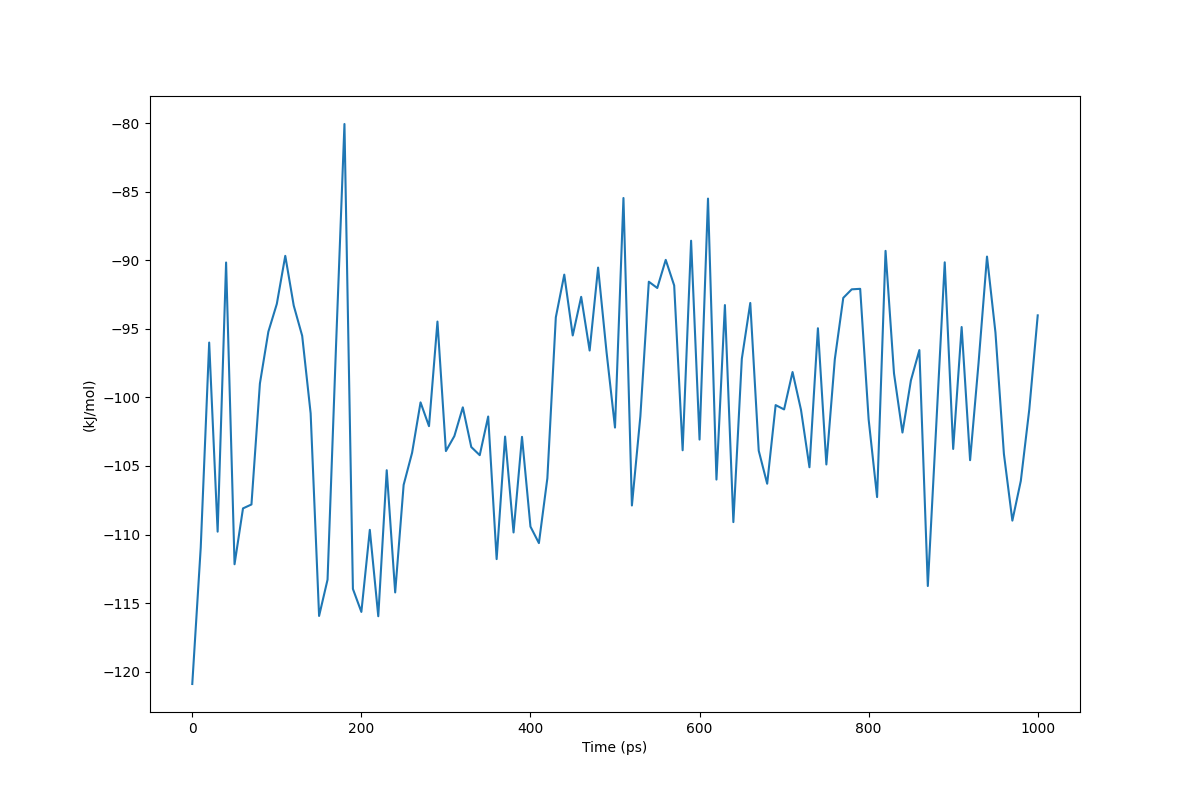

In [16]:
im = Image.open('./prod_ie_sum.png')
im

### リガンドRMSDトラジェクトリの表示

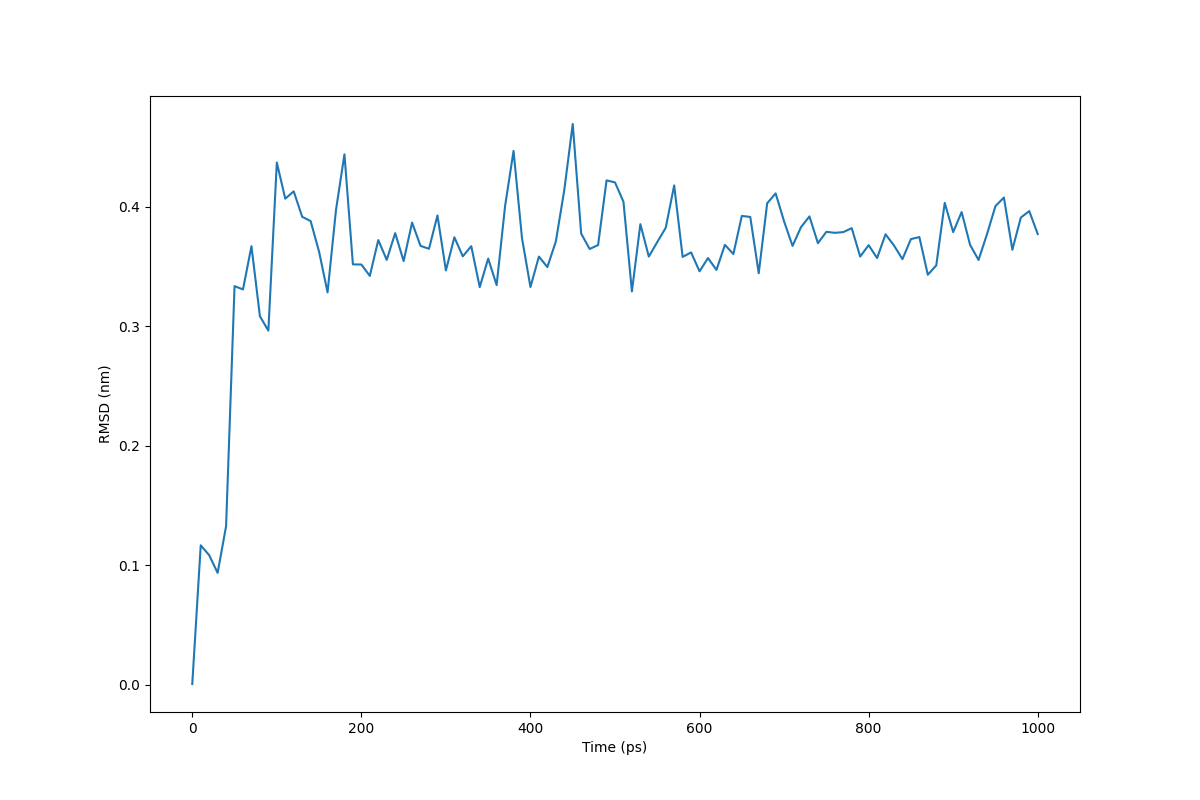

In [17]:
im = Image.open('./prod_nowat_fit_rms.png')
im

### リガンドRMSFの表示

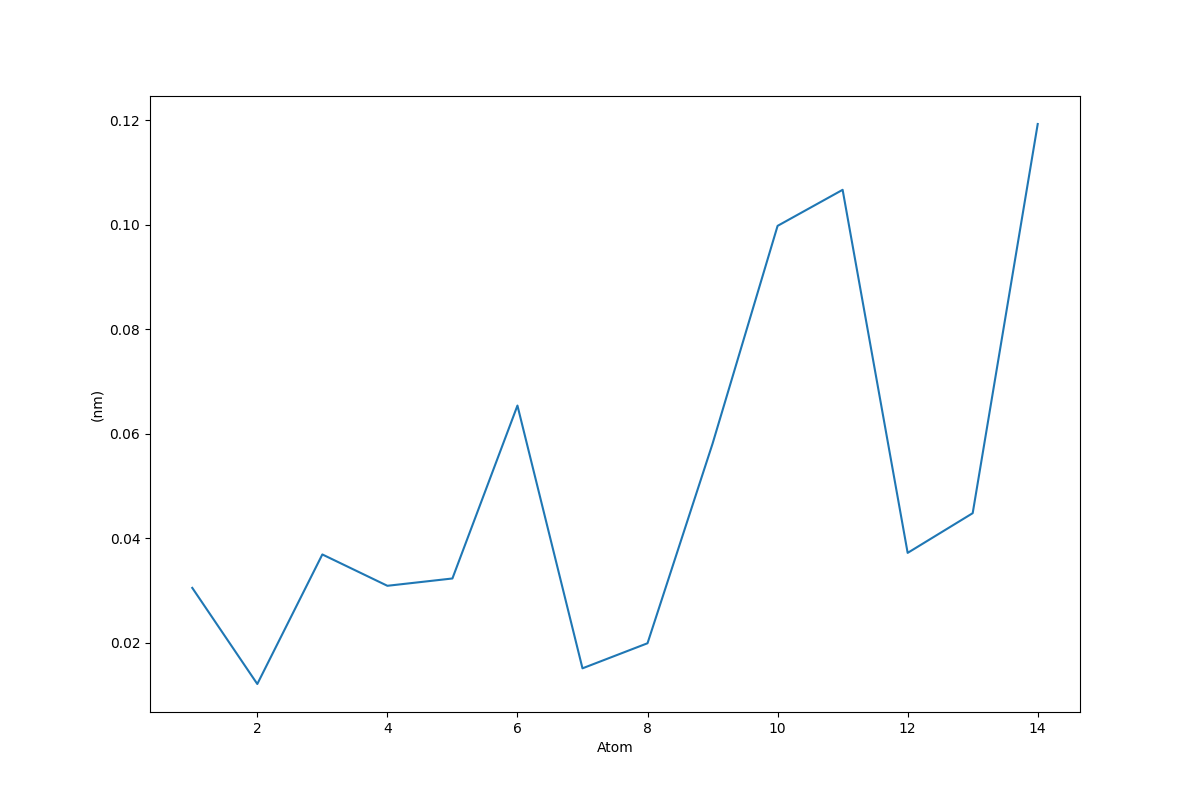

In [18]:
im = Image.open('./prod_nowat_fit_rmsf.png')
im